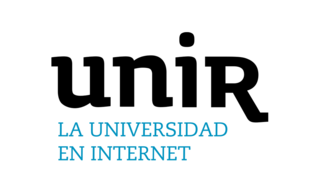
_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Técnicas de agrupamiento

## Objetivos

- Entender los métodos de clustering K-means, jerárquico y DBSCAN.
- Generar agrupamientos con los métodos de clustering previamente indicados y realizar una comparativa.
- Investigar sobre una técnica de agrupamiento con un caso de uso concreto.


## Descripción de la actividad

El conjunto de datos con el cual vamos a trabajar se encuentra en el siguiente enlace: https://www.kaggle.com/datasets/umerrtx/machine-failure-prediction-using-sensor-data

Este conjunto de datos contiene datos de sensores recopilados de varias máquinas, con el objetivo de predecir fallos de las máquinas con antelación. Incluye una variedad de lecturas de sensores, así como las fallas de la máquina registradas.

### Tareas a realizar
- Clustering
  - Debes completar el código pedido en este notebook y contestar las preguntas finales.
  - Buscar dos artículos científicos (https://scholar.google.es/) con un caso de uso de técnicas de agrupamiento. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para cada artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la detección de anomalías.
    - Técnicas de detección de anomalías empleadas.
    - Principales resultados de la aplicación y de la investigación.


#### Nombre del estudiante

MARIANO ORTEGA DE MUES

### Clustering

Comenzamos importando las librerías necesarias y cargando el dataset.

Este archivo contiene 944 mediciones de sensores de diferentes máquinas, contiene una etiqueta de si tiene fallo o no.

Notas:
1. footfall: The number of people or objects passing by the machine.
2. tempMode: The temperature mode or setting of the machine.
3. AQ: Air quality index near the machine.
4. USS: Ultrasonic sensor data, indicating proximity measurements.
5. CS: Current sensor readings, indicating the electrical current usage of the machine.
6. VOC: Volatile organic compounds level detected near the machine.
7. RP: Rotational position or RPM (revolutions per minute) of the machine parts.
8. IP: Input pressure to the machine.
9. Temperature: The operating temperature of the machine.
10. fail: Binary indicator of machine failure (1 for failure, 0 for no failure).

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# se carga el dataset, con separados 
df = pd.read_csv('data.csv', sep=',') 

#### ¿Cuántas instancias tiene el dataset?

In [2]:
df.shape

(944, 10)

.- Tiene 10 columnas y 944 rows.

#### ¿Cuál es el tipo de datos predominante en el dataset?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


Todos los datos son numericos int64. No hay datos nulos.

#### ¿Son variables continuas o categóricas?

In [4]:
resultados_unicos = {columna: df[columna].unique().tolist() for columna in df.columns}

for nombre_variable, valores_unicos in resultados_unicos.items():
    print(f"Variable: {nombre_variable}")
    print(f"Valores únicos: {valores_unicos}\n")


Variable: footfall
Valores únicos: [0, 190, 31, 83, 640, 110, 100, 180, 2800, 1600, 330, 1000, 130, 5, 33, 19, 74, 12, 390, 40, 3, 450, 350, 64, 62, 11, 4, 35, 270, 45, 6, 2, 3500, 67, 30, 400, 15, 22, 32, 59, 170, 1, 53, 16, 27, 84, 200, 20, 7300, 13, 9, 44, 51, 29, 630, 50, 720, 24, 55, 63, 71, 900, 370, 470, 47, 8, 290, 10, 93, 510, 56, 7, 140, 14, 310, 37, 23, 360, 87, 42, 70, 520, 54, 75, 34, 76, 430, 150, 25, 18, 740, 81, 160, 220, 26, 88, 66, 570, 17]

Variable: tempMode
Valores únicos: [7, 1, 4, 3, 0, 5, 2, 6]

Variable: AQ
Valores únicos: [7, 3, 2, 5, 4, 6, 1]

Variable: USS
Valores únicos: [1, 3, 2, 4, 6, 7, 5]

Variable: CS
Valores únicos: [6, 5, 4, 3, 7, 2, 1]

Variable: VOC
Valores únicos: [6, 1, 0, 4, 3, 5, 2]

Variable: RP
Valores únicos: [36, 20, 24, 28, 68, 21, 77, 31, 39, 26, 22, 42, 74, 62, 58, 51, 88, 27, 44, 45, 40, 48, 34, 60, 32, 33, 57, 84, 75, 19, 47, 35, 43, 76, 46, 38, 69, 67, 72, 37, 30, 64, 59, 55, 65, 73, 91, 71, 83, 53, 82, 49, 56, 25, 85, 70, 78, 80, 79,

A la vista de los valores unicos de las variables, tomaremos como continuas solo footfall, RP y Temperature. Todas las demas las consideraremos categoricas.

#### ¿cuáles son los valores mínimo y máximo de la variable 'RP'?

In [5]:
df.describe()

footfall    tempMode          AQ         USS          CS  \
count   944.000000  944.000000  944.000000  944.000000  944.000000   
mean    306.381356    3.727754    4.325212    2.939619    5.394068   
std    1082.606745    2.677235    1.438436    1.383725    1.269349   
min       0.000000    0.000000    1.000000    1.000000    1.000000   
25%       1.000000    1.000000    3.000000    2.000000    5.000000   
50%      22.000000    3.000000    4.000000    3.000000    6.000000   
75%     110.000000    7.000000    6.000000    4.000000    6.000000   
max    7300.000000    7.000000    7.000000    7.000000    7.000000   

              VOC          RP          IP  Temperature        fail  
count  944.000000  944.000000  944.000000   944.000000  944.000000  
mean     2.842161   47.043432    4.565678    16.331568    0.416314  
std      2.273337   16.423130    1.599287     5.974781    0.493208  
min      0.000000   19.000000    1.000000     1.000000    0.000000  
25%      1.000000   34.000000    3.000000    14.000000    0.000000  
50%      2.000000   44.000000    4.000000    17.000000    0.000000  
75%      5.000000   58.000000    6.000000    21.000000    1.000000  
max      6.000000   91.000000    7.000000    24.000000    1.000000

El valor minimo de RP es 19 rpm y el maximo 91 rmp.

#### Para los algoritmos de clustering el dataset no puede tener instancias con datos faltantes. ¿Tiene este dataset datos faltantes?

In [6]:
df.isnull().sum()

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

No hay valores faltantes.

#### Elimine la variable fail

In [7]:
df_copia = df.drop(columns=['fail'])

.- He hecho un drop de la columna, y una copia de los datos por si necesito posteriormente emplearlo.

#### ¿Es necesario hacer algún tratamiendo adicional sobre los datos?

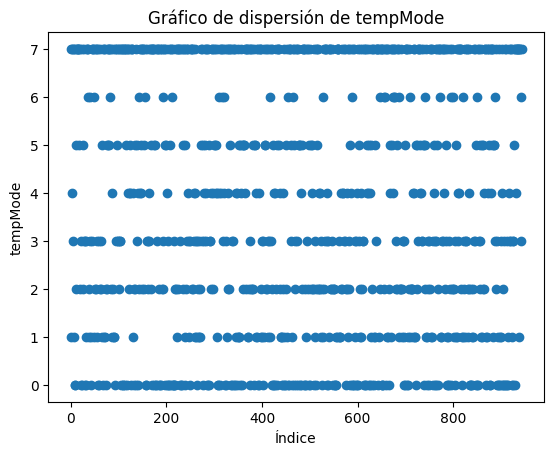

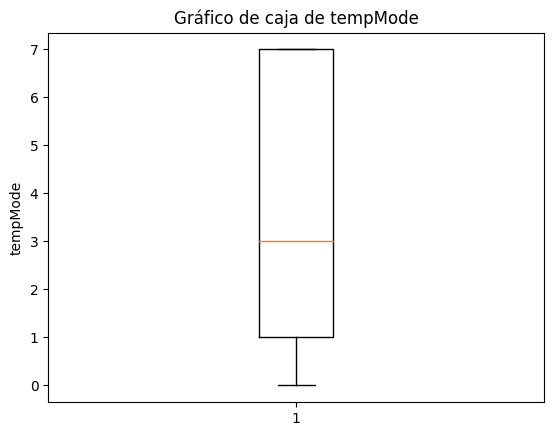

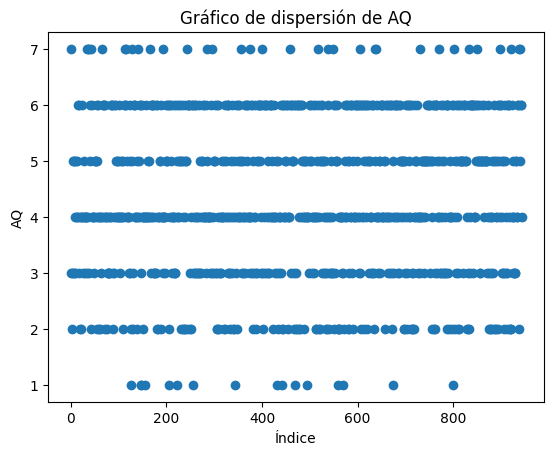

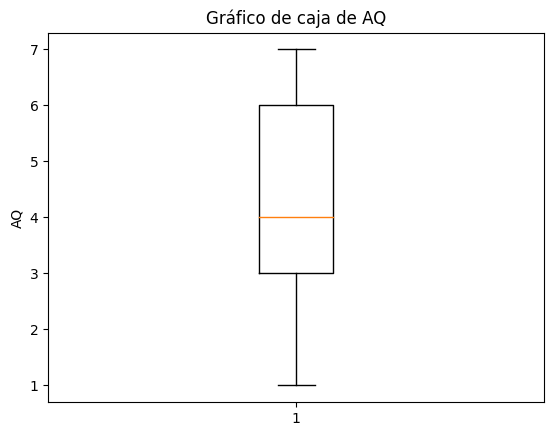

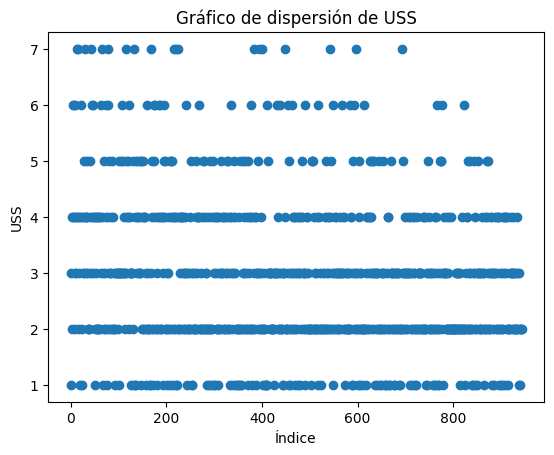

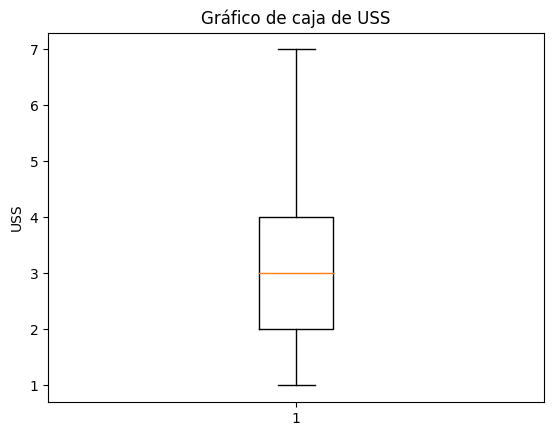

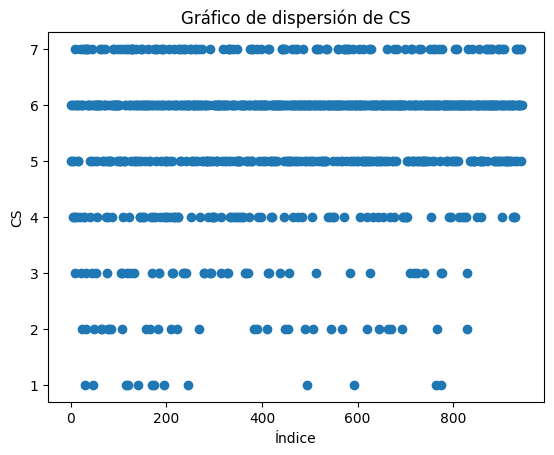

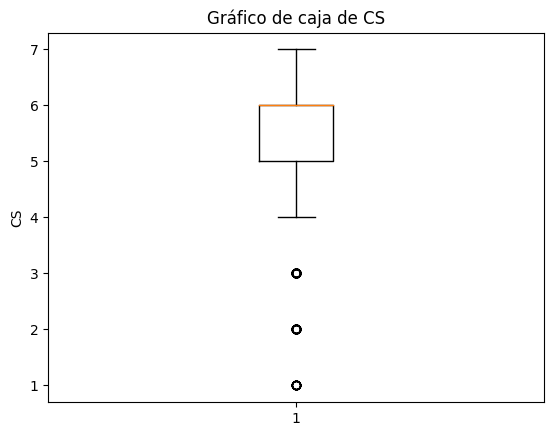

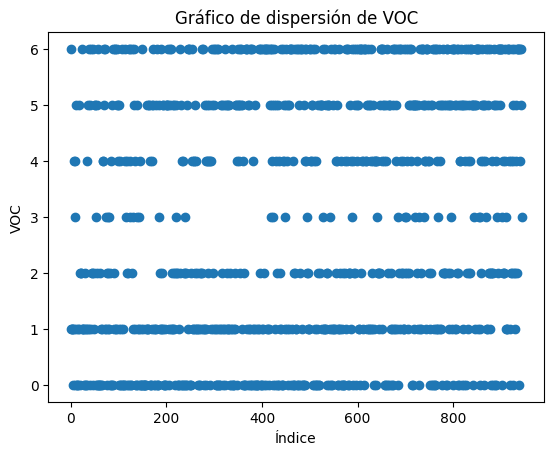

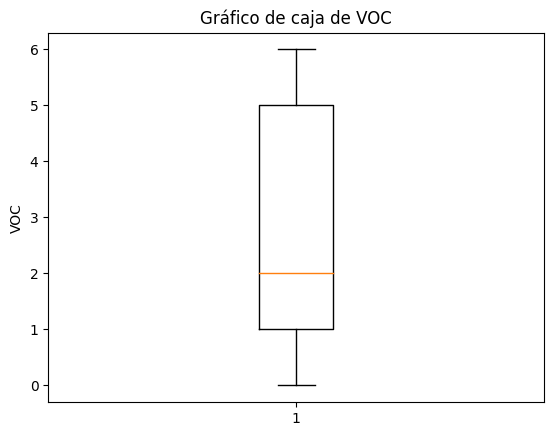

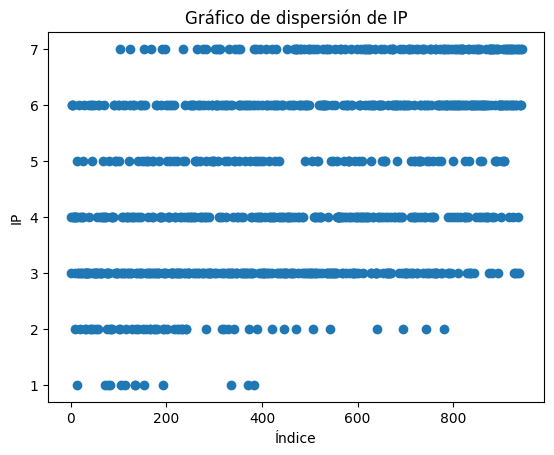

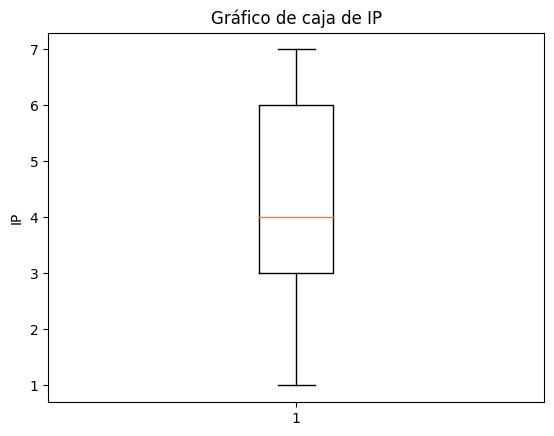

In [8]:
for variable in ['tempMode','AQ', 'USS', 'CS','VOC','IP']:
    plt.figure()
    plt.scatter(df_copia.index, df_copia[variable])
    plt.title(f"Gráfico de dispersión de {variable}")
    plt.xlabel("Índice")
    plt.ylabel(variable)
    plt.show()

    plt.figure()
    plt.boxplot(df_copia[variable].dropna())
    plt.title(f"Gráfico de caja de {variable}")
    plt.ylabel(variable)
    plt.show()

.- Verificamos que las distribuciones de las variables categoricas para asegurarnos de haber elegido las correctas. La variable 'CS' parece tener outlayers, sin embargo no los eliminanos, las muestras con valores en las categorias iniciales son mas escasos pero son significativos.

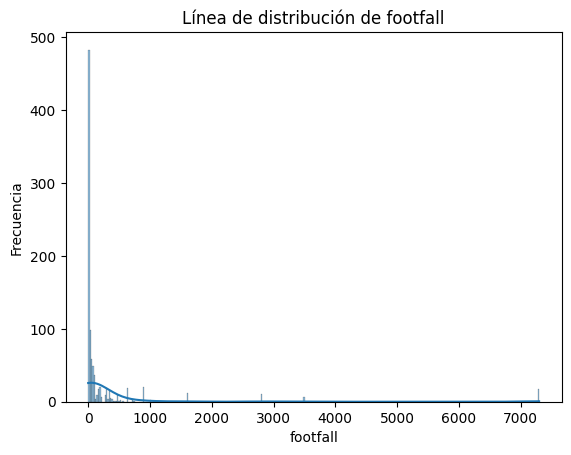

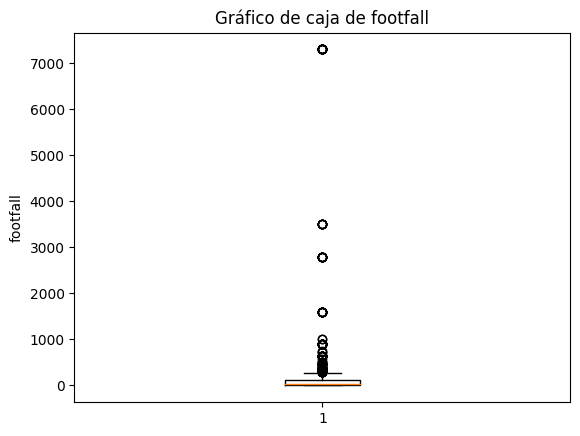

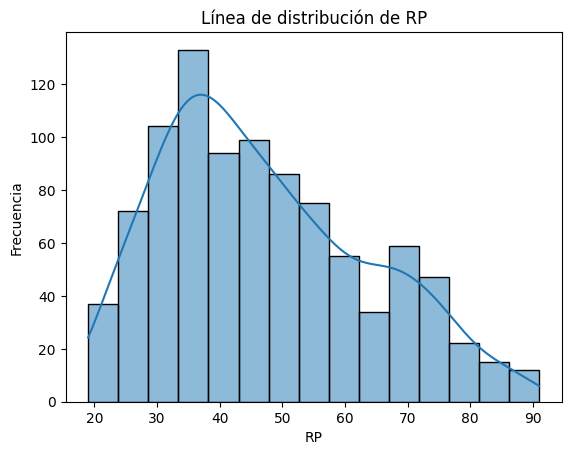

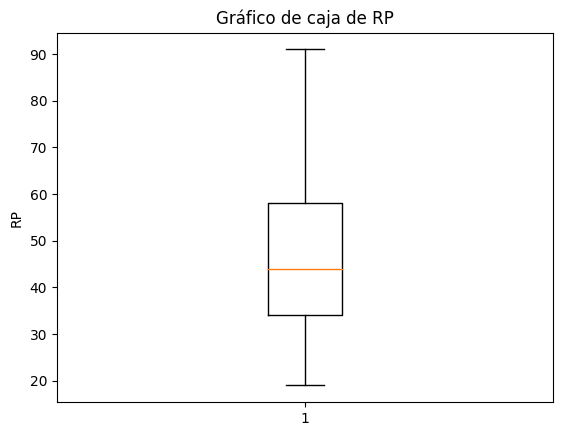

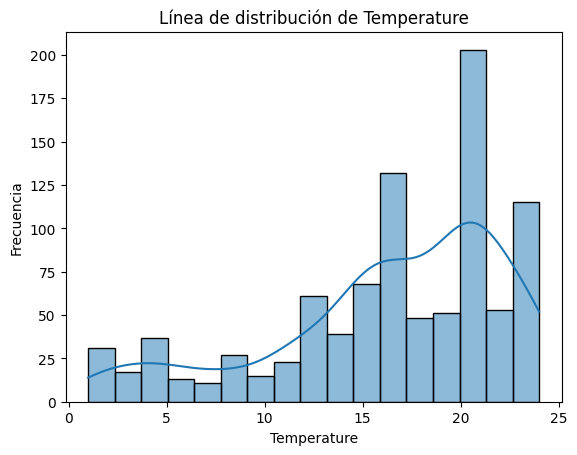

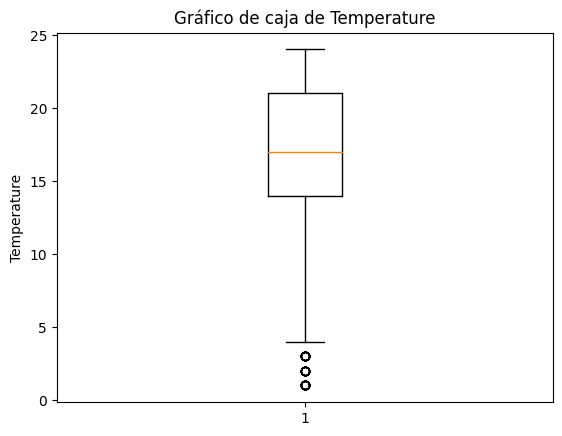

In [9]:
for variable in ['footfall','RP', 'Temperature']:
    plt.figure()
    sns.histplot(df_copia[variable], kde=True)
    plt.title(f"Línea de distribución de {variable}")
    plt.xlabel(variable)
    plt.ylabel("Frecuencia")
    plt.show()

    plt.figure()
    plt.boxplot(df_copia[variable].dropna())
    plt.title(f"Gráfico de caja de {variable}")
    plt.ylabel(variable)
    plt.show()

In [10]:

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

escalador = MinMaxScaler()

df_normalizado = df_copia

df_normalizado[df_normalizado.columns] = escalador.fit_transform(df_normalizado[df_normalizado.columns])



In [11]:
df_normalizado.to_csv('dataset_normalizado.csv', index=False)
df_copia.to_csv('df_copia.csv', index=False)



.- Normalizado de las variables.

## K-Means

Crea 10 modelos de KMeans y entrénalos. Haciendo uso del método indicado para saber el número ideal de clústeres.

.- Empleo tanto el metodo de silhouette_score como el de  

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def find_optimal_k(data, max_k=10):
  silhouette_scores = []
  K_values = range(2, max_k + 1)

  # Try different values of K (number of clusters)
  for K in K_values:
      kmeans = KMeans(n_clusters=K, init='random', n_init=1, random_state=42)
      kmeans.fit(data)
      cluster_labels = kmeans.labels_
      silhouette_avg = silhouette_score(data, cluster_labels)
      silhouette_scores.append(silhouette_avg)

  # Plot silhouette scores for each K value
  plt.figure(figsize=(8, 6))
  plt.plot(K_values, silhouette_scores, marker='o')
  plt.title('Silhouette Score for different K values')
  plt.xlabel('Number of clusters (K)')
  plt.ylabel('Silhouette Score')
  plt.grid(True)
  plt.show()

  # Find the optimal K (highest silhouette score)
  optimal_k = K_values[np.argmax(silhouette_scores)]
  print(f"Optimal number of clusters: {optimal_k}")

  return optimal_k

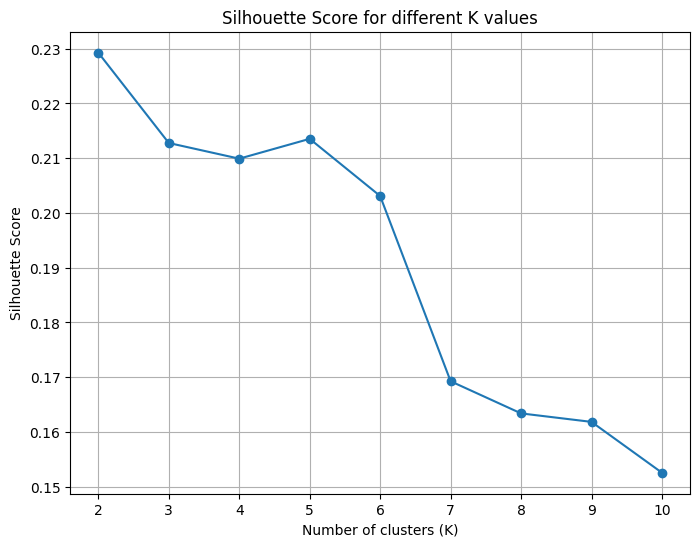

Optimal number of clusters: 2


In [13]:
optimal_k = find_optimal_k(df_copia, max_k=10)

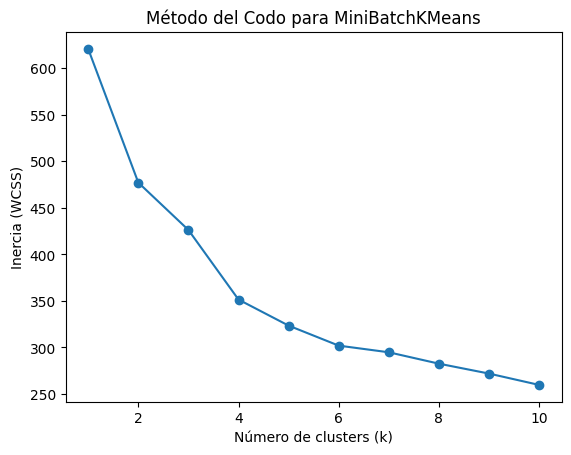

In [14]:

from sklearn.cluster import MiniBatchKMeans
inercia = []
rangos_k = range(1, 11)
X=df_normalizado.values

for k in rangos_k:
    modelo_minibatch = MiniBatchKMeans(n_clusters=k, n_init=3, batch_size=100, random_state=42)  # Establece n_init explícitamente
    modelo_minibatch.fit(X)
    inercia.append(modelo_minibatch.inertia_)

plt.plot(rangos_k, inercia, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (WCSS)")
plt.title("Método del Codo para MiniBatchKMeans")
plt.show()

In [15]:
kmeansmodel = KMeans(n_clusters=2, init='random', n_init=1, random_state=42)
kmeansmodel.fit(df_normalizado)

KMeans(init='random', n_clusters=2, n_init=1, random_state=42)

Ahora toca interpretar lo que Kmeans ha realizado. Recordemos que el objetivo de KMeans es encontrar patrones en los datos.

Lo primero que vamos a realizar es un gráfico para visualizar los clústers que ha creado con base en las variables utilizadas para crearlos.

In [16]:
import plotly.express as px

X =df_normalizado.values

clusters = pd.DataFrame(X,columns=df_normalizado.columns)
clusters['kmeans'] = kmeansmodel.labels_
polar = clusters.groupby("kmeans").mean().reset_index()
polar = pd.melt(polar,id_vars=["kmeans"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="kmeans", line_close=True,height=800,width=600)
fig4.show()

In [17]:
clusters.head()

footfall  tempMode        AQ       USS        CS       VOC        RP  \
0  0.000000  1.000000  1.000000  0.000000  0.833333  1.000000  0.236111   
1  0.026027  0.142857  0.333333  0.333333  0.666667  0.166667  0.013889   
2  0.004247  1.000000  0.166667  0.166667  0.833333  0.166667  0.069444   
3  0.011370  0.571429  0.333333  0.500000  0.666667  0.166667  0.125000   
4  0.087671  1.000000  0.666667  0.833333  0.500000  0.000000  0.680556   

         IP  Temperature  kmeans  
0  0.333333          0.0       1  
1  0.500000          0.0       0  
2  0.833333          0.0       0  
3  0.833333          0.0       0  
4  0.833333          0.0       0

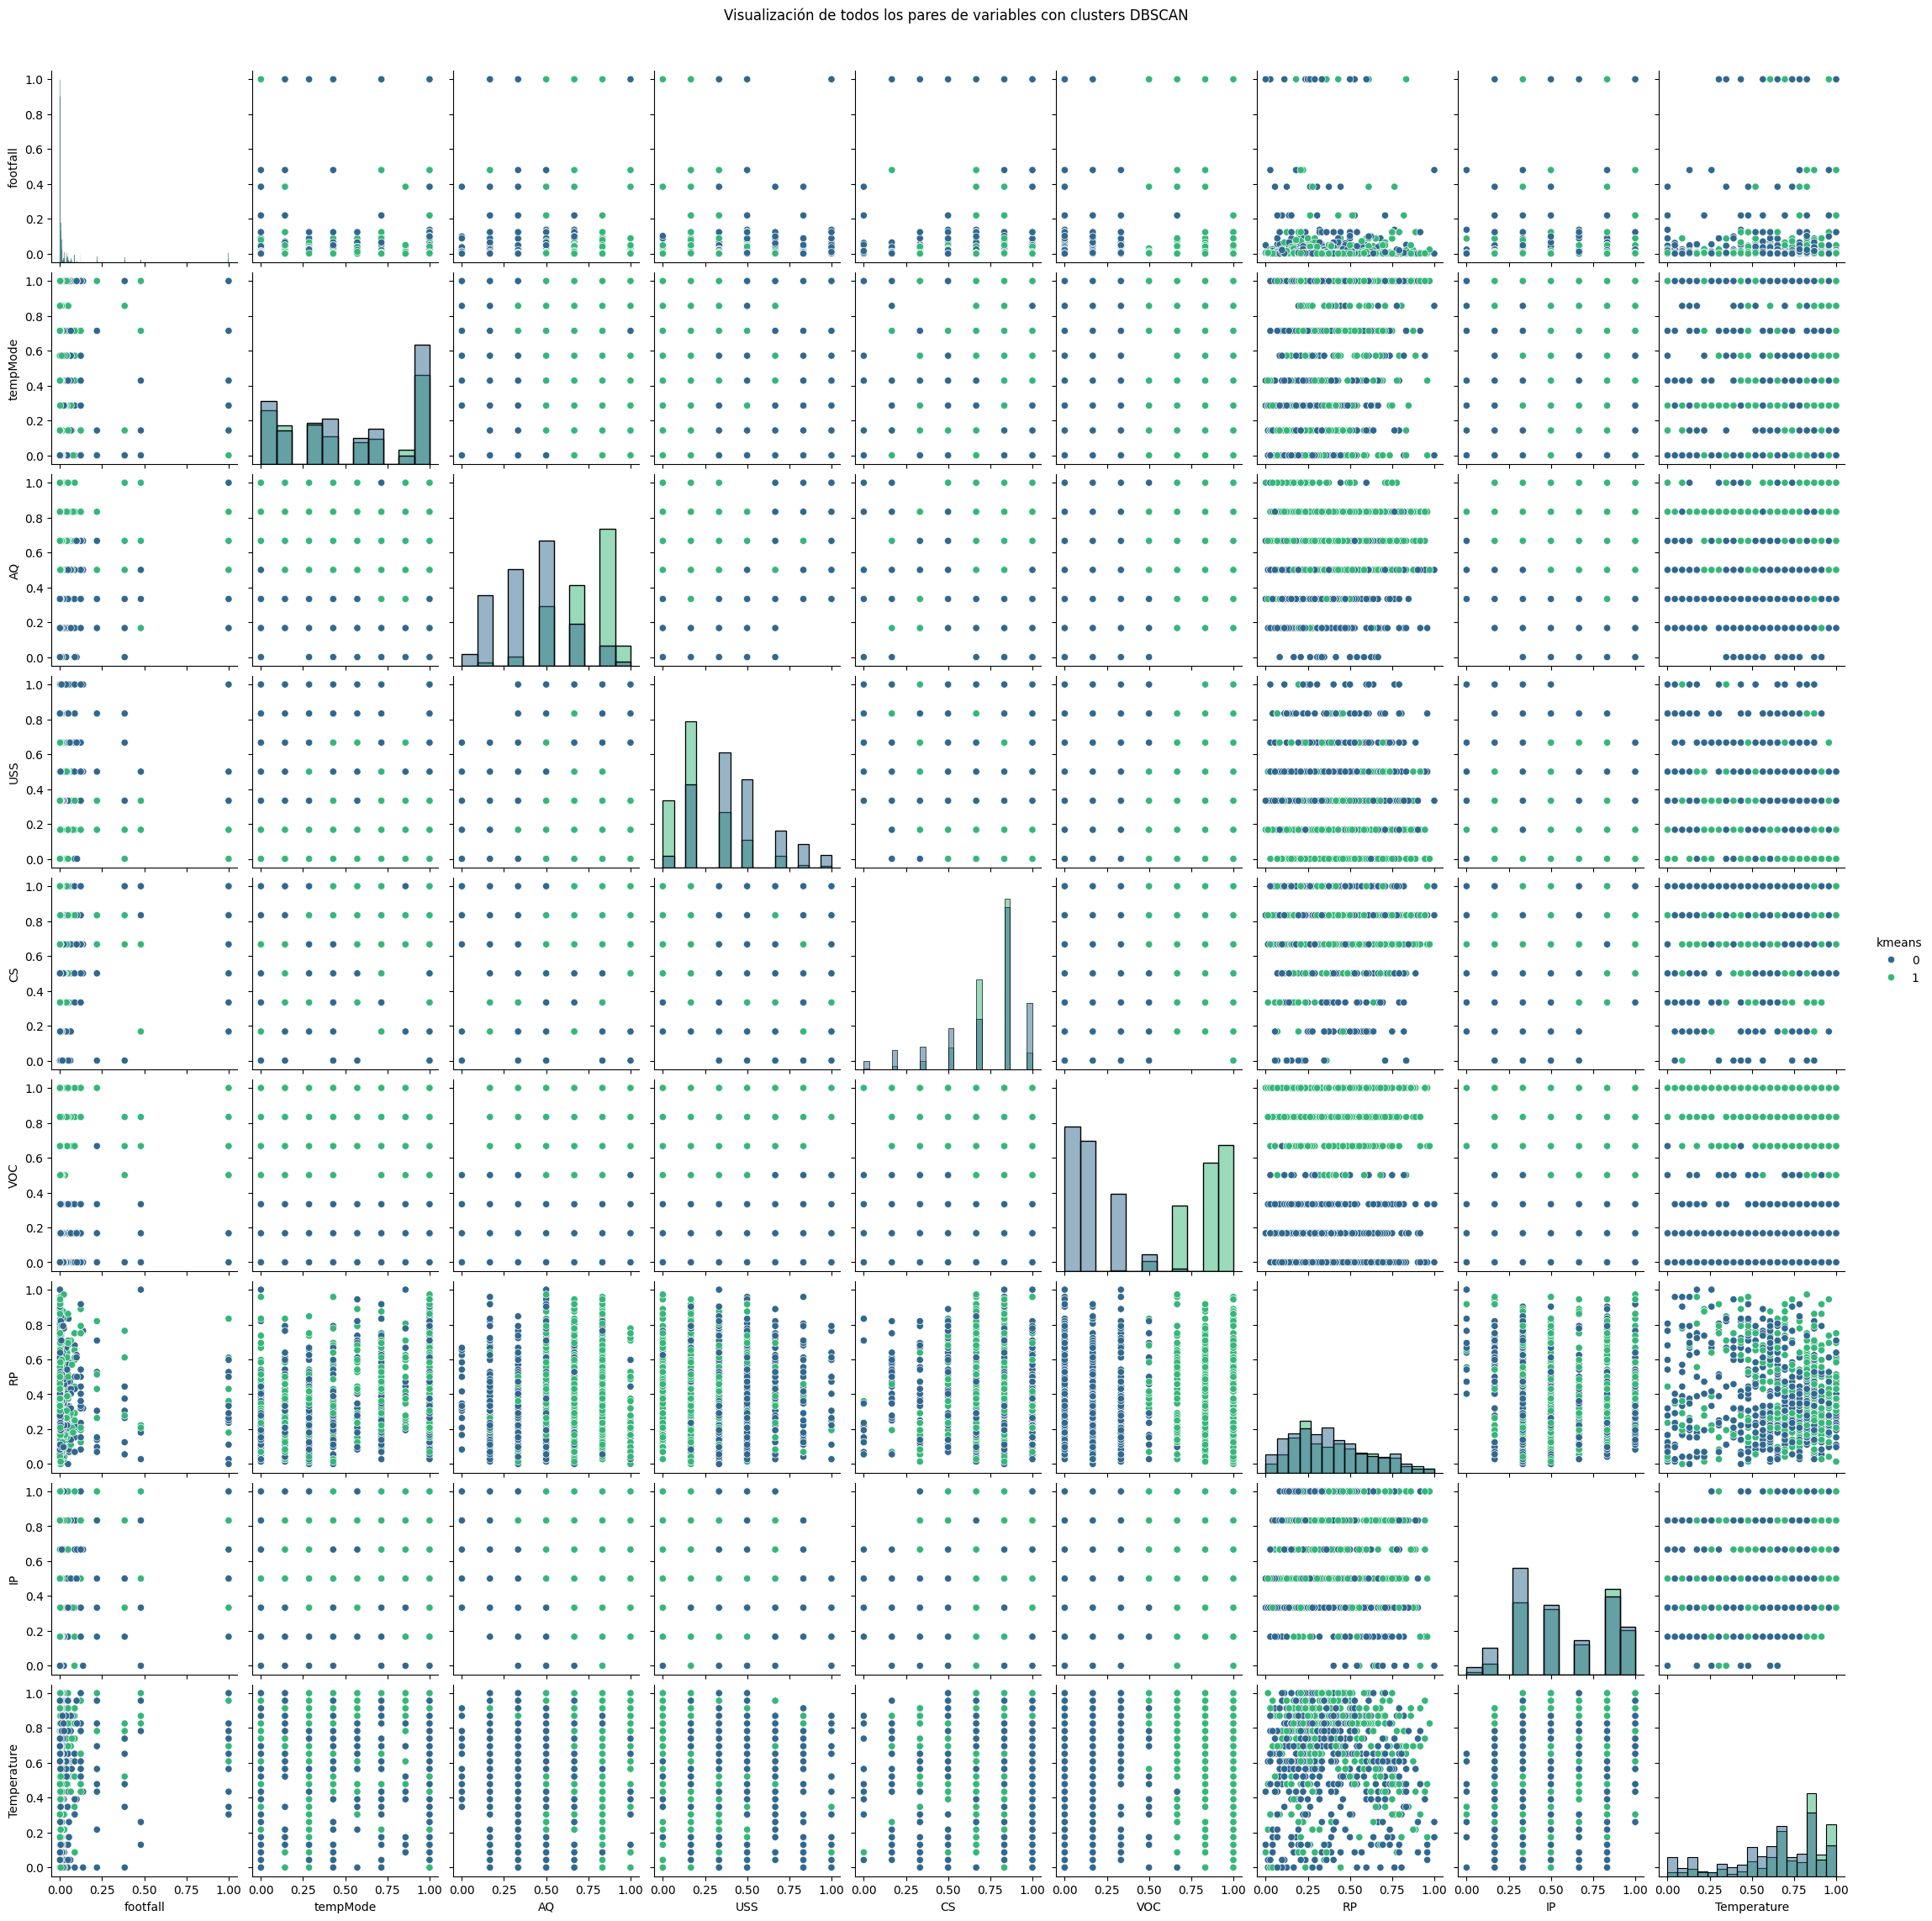

In [18]:
# Visualizar todos los pares de variables coloreando por clusters
sns.pairplot(clusters, hue='kmeans', palette='viridis', diag_kind="hist")
plt.suptitle("Visualización de todos los pares de variables con clusters DBSCAN", y=1.02)
plt.show()

## DBSCAN

In [19]:
#### Realiza una búsqueda de los mejores hiperparámetros para el algoritmo

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import silhouette_score
import numpy as np

dbscan = DBSCAN()

param_distributions = {
    'eps': np.linspace(0.1, 2.0, 10),
    'min_samples': np.arange(2, 13)
}

def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    if len(set(labels)) > 1:
        return silhouette_score(X, labels)
    else:
        return -1

random_search = RandomizedSearchCV(dbscan, param_distributions, n_iter=20, scoring=silhouette_scorer, random_state=42)
random_search.fit(df_normalizado)

print("Mejores parámetros encontrados:", random_search.best_params_)
best_model = random_search.best_estimator_
print("Mejor modelo encontrado:", best_model)

Mejores parámetros encontrados: {'min_samples': 11, 'eps': 0.7333333333333333}
Mejor modelo encontrado: DBSCAN(eps=0.7333333333333333, min_samples=11)


In [21]:
df_normalizado.head()

footfall  tempMode        AQ       USS        CS       VOC        RP  \
0  0.000000  1.000000  1.000000  0.000000  0.833333  1.000000  0.236111   
1  0.026027  0.142857  0.333333  0.333333  0.666667  0.166667  0.013889   
2  0.004247  1.000000  0.166667  0.166667  0.833333  0.166667  0.069444   
3  0.011370  0.571429  0.333333  0.500000  0.666667  0.166667  0.125000   
4  0.087671  1.000000  0.666667  0.833333  0.500000  0.000000  0.680556   

         IP  Temperature  
0  0.333333          0.0  
1  0.500000          0.0  
2  0.833333          0.0  
3  0.833333          0.0  
4  0.833333          0.0

In [22]:
#### Entrenar el algoritmo DBSCAN con los hiperparámetros encontrados

In [23]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas que se usarán para el clustering
columnas_para_clustering = df_normalizado.columns.to_list()

# Aplicar DBSCAN a los datos normalizados
dbscan = DBSCAN(eps=0.73, min_samples=11)  
labels = dbscan.fit_predict(df_normalizado[columnas_para_clustering])

# Almacenar las etiquetas de los clusters en una nueva columna del DataFrame
clusters['Cluster_DBSCAN'] = labels

# Mostrar las primeras filas con las etiquetas de los clusters generados
print(clusters[['Cluster_DBSCAN']].head())

   Cluster_DBSCAN
0               0
1               0
2               0
3               0
4               0


In [24]:
clusters.head()

footfall  tempMode        AQ       USS        CS       VOC        RP  \
0  0.000000  1.000000  1.000000  0.000000  0.833333  1.000000  0.236111   
1  0.026027  0.142857  0.333333  0.333333  0.666667  0.166667  0.013889   
2  0.004247  1.000000  0.166667  0.166667  0.833333  0.166667  0.069444   
3  0.011370  0.571429  0.333333  0.500000  0.666667  0.166667  0.125000   
4  0.087671  1.000000  0.666667  0.833333  0.500000  0.000000  0.680556   

         IP  Temperature  kmeans  Cluster_DBSCAN  
0  0.333333          0.0       1               0  
1  0.500000          0.0       0               0  
2  0.833333          0.0       0               0  
3  0.833333          0.0       0               0  
4  0.833333          0.0       0               0

In [25]:
#### Elegir dos variables para visualizar los clústeres

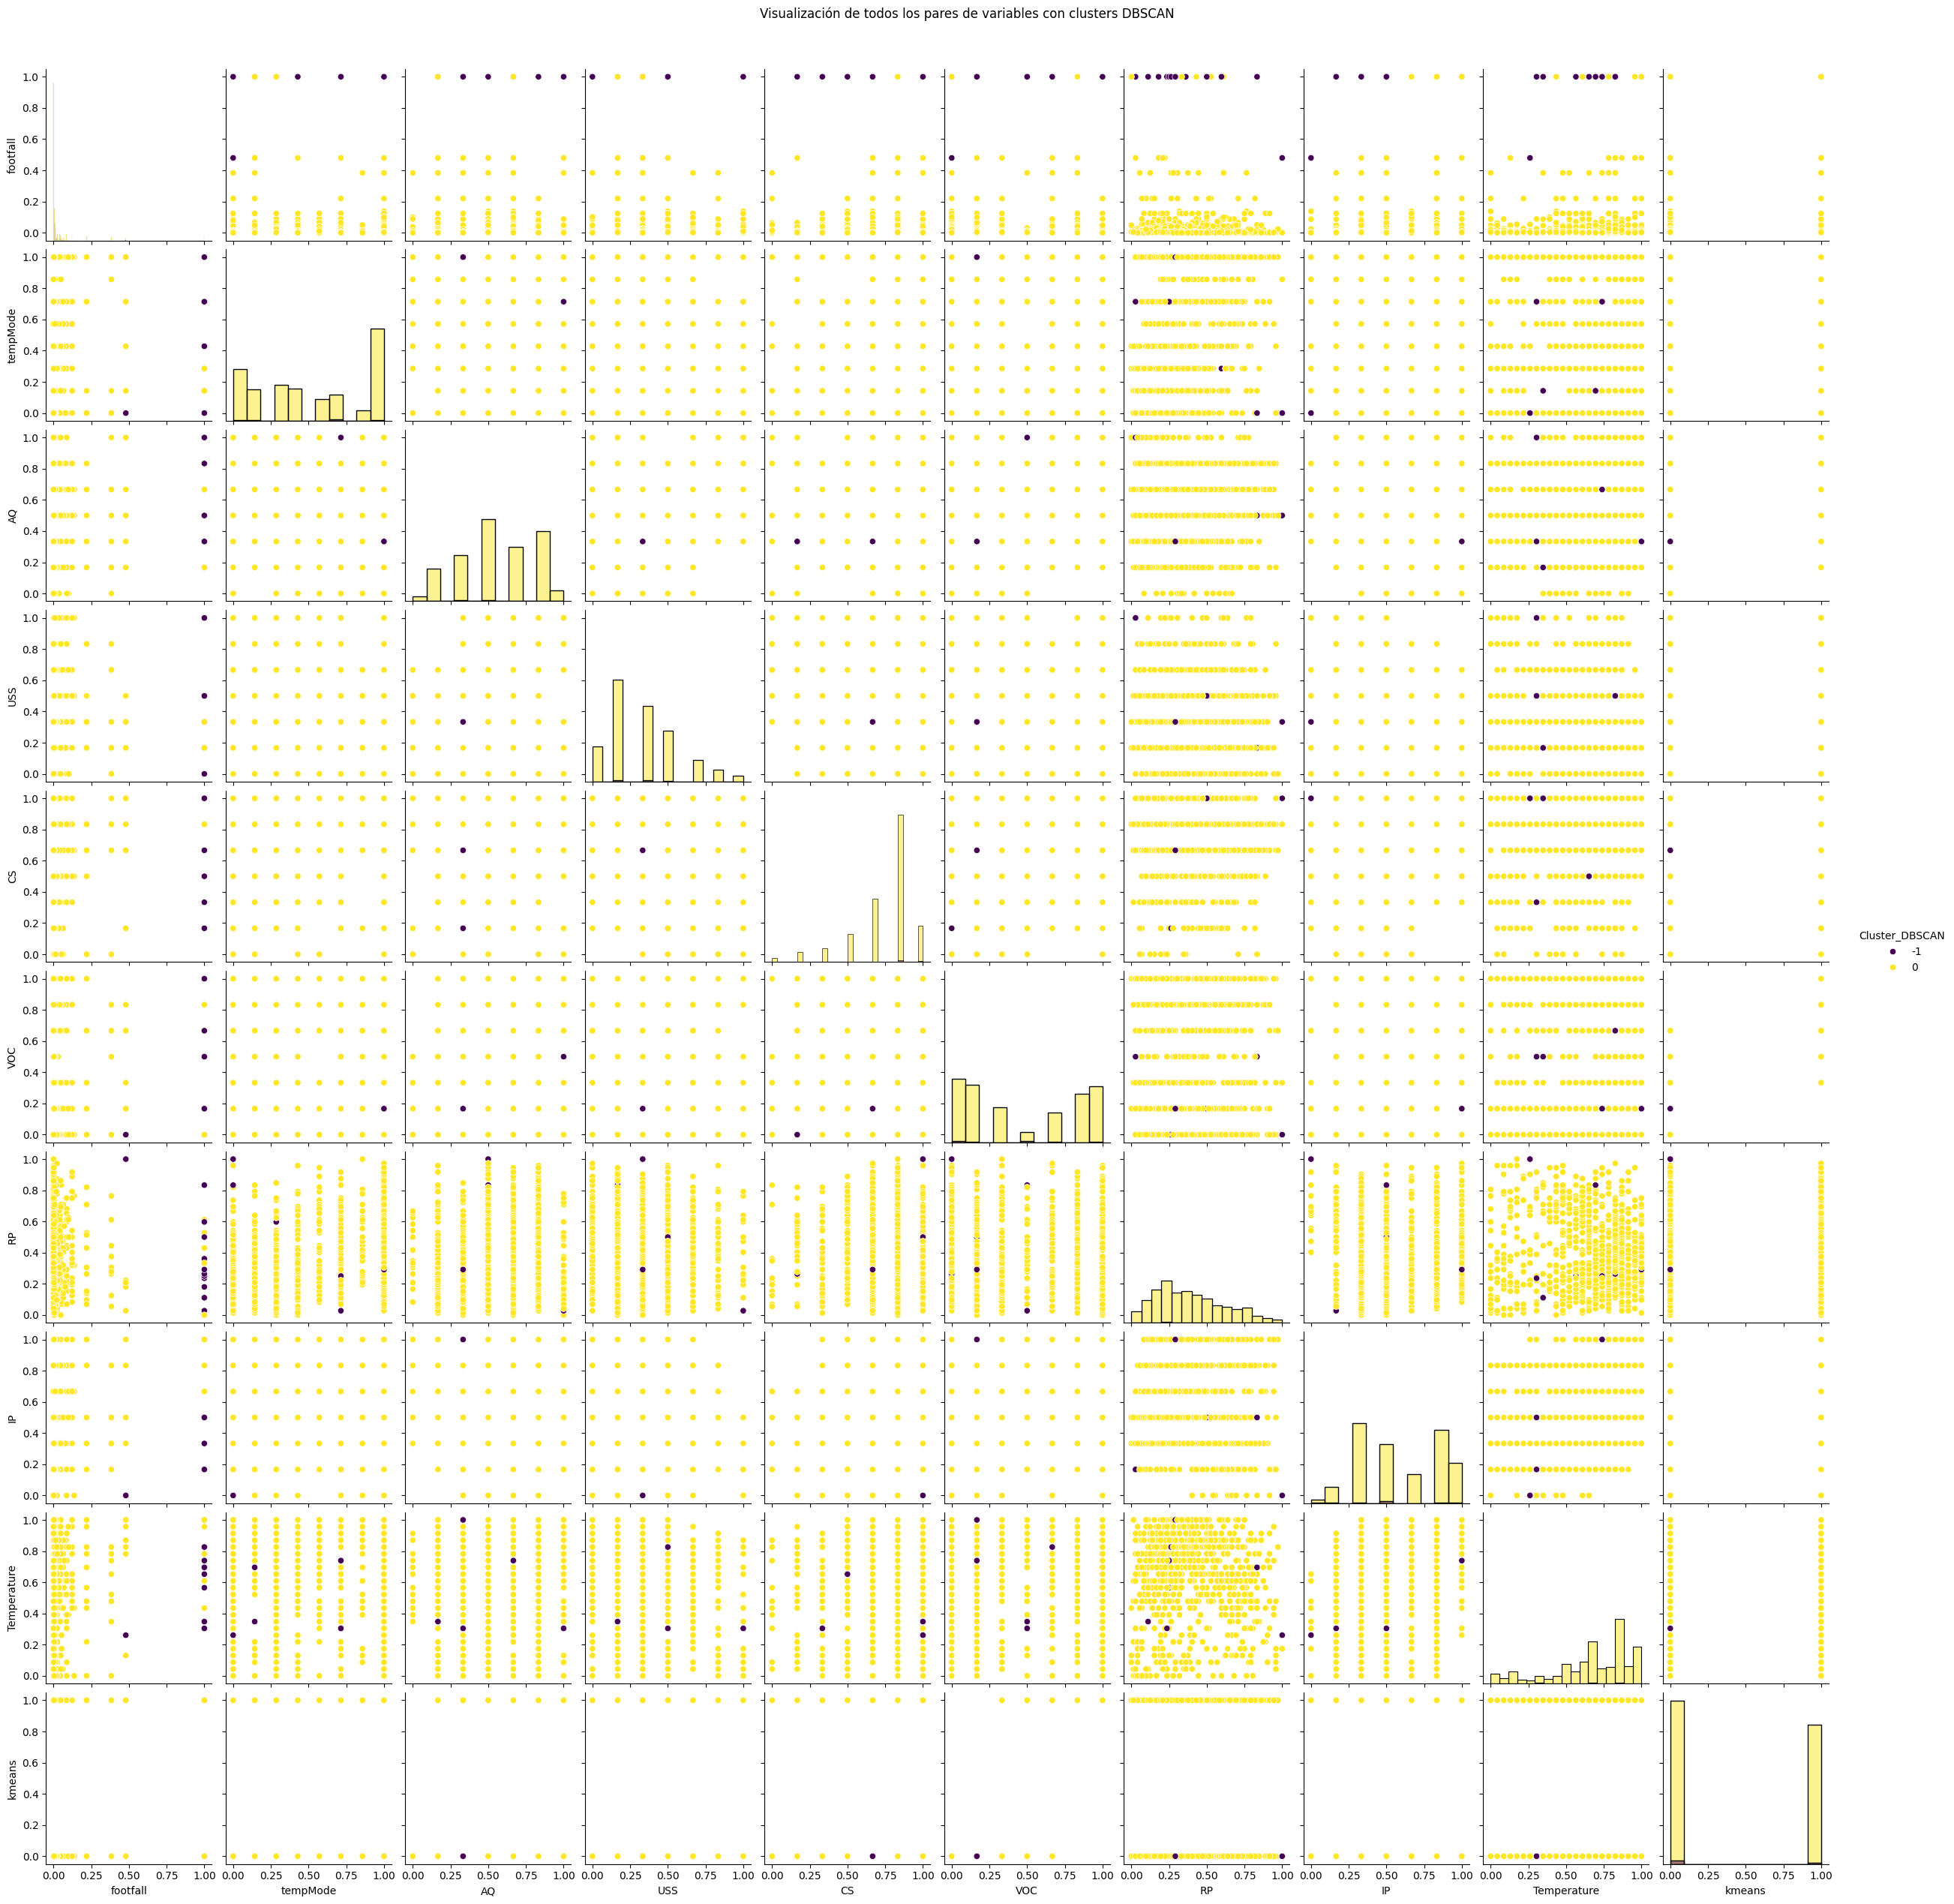

In [26]:
# Visualizar todos los pares de variables coloreando por clusters
sns.pairplot(clusters, hue='Cluster_DBSCAN', palette='viridis', diag_kind="hist")
plt.suptitle("Visualización de todos los pares de variables con clusters DBSCAN", y=1.02)
plt.show()

## Dendrograma 

In [27]:
#### Aplica el algoritmo de AgglomerativeClustering a los datos

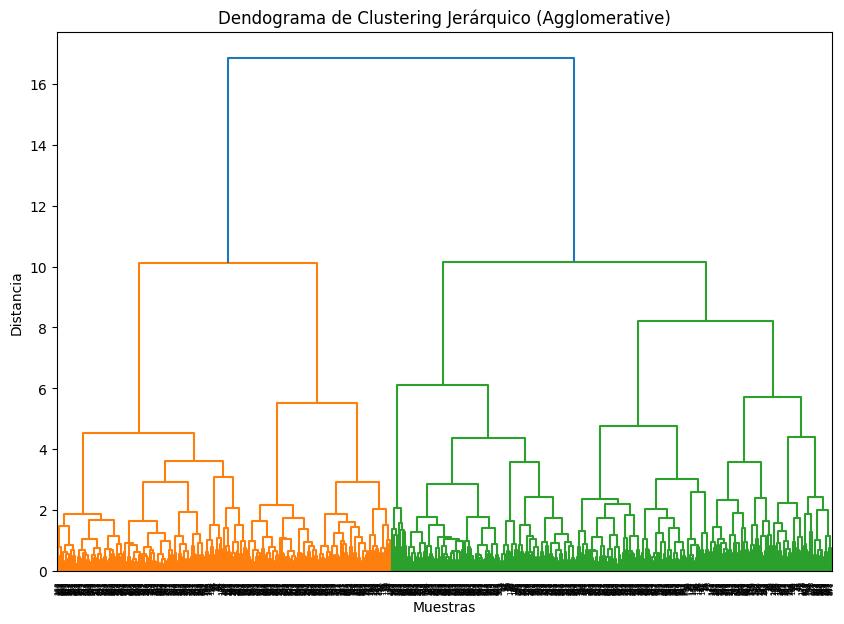

In [28]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Definir el modelo de Agglomerative Clustering
modelo_agglomerative = AgglomerativeClustering( linkage='ward')

# Ajustar el modelo y obtener las etiquetas
labels = modelo_agglomerative.fit_predict(df_normalizado)

# Generar el dendograma
Z = linkage(df_normalizado, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.xlabel("Muestras")
plt.ylabel("Distancia")
plt.title("Dendograma de Clustering Jerárquico (Agglomerative)")
plt.show()

.- El punto de mayor distancia parece estar a partir de 10, en este caso tendriamos 2 clusters tambien.

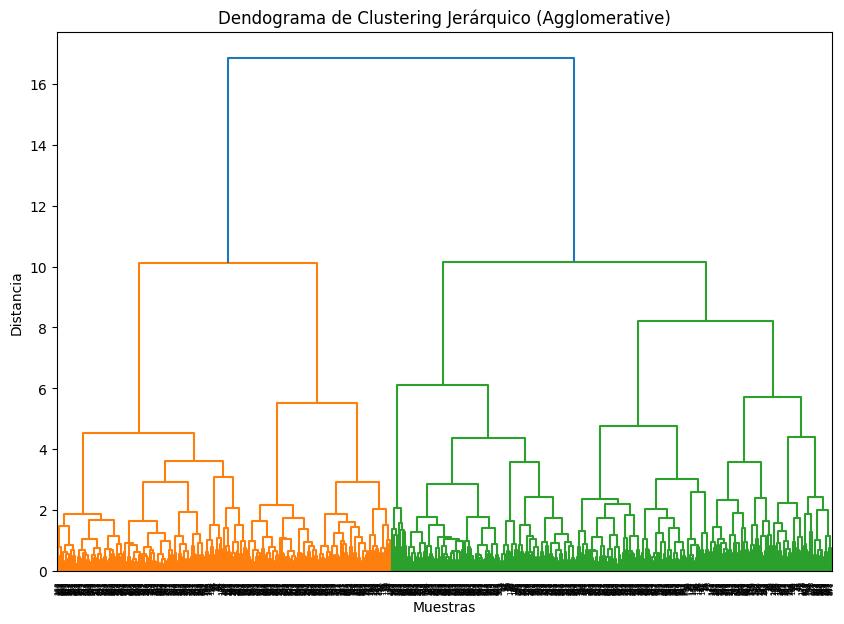

In [29]:

# Definir el modelo de Agglomerative Clustering
modelo_agglomerative = AgglomerativeClustering( n_clusters=2, linkage='ward')

# Ajustar el modelo y obtener las etiquetas
labels = modelo_agglomerative.fit_predict(df_normalizado)

# Generar el dendograma
Z = linkage(df_normalizado, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.xlabel("Muestras")
plt.ylabel("Distancia")
plt.title("Dendograma de Clustering Jerárquico (Agglomerative)")
plt.show()

labels = modelo_agglomerative.fit_predict(df_normalizado)
clusters['Cluster_DENDOGRAMA'] = labels


In [30]:
clusters

footfall  tempMode        AQ       USS        CS       VOC        RP  \
0    0.000000  1.000000  1.000000  0.000000  0.833333  1.000000  0.236111   
1    0.026027  0.142857  0.333333  0.333333  0.666667  0.166667  0.013889   
2    0.004247  1.000000  0.166667  0.166667  0.833333  0.166667  0.069444   
3    0.011370  0.571429  0.333333  0.500000  0.666667  0.166667  0.125000   
4    0.087671  1.000000  0.666667  0.833333  0.500000  0.000000  0.680556   
..        ...       ...       ...       ...       ...       ...       ...   
939  0.000000  1.000000  1.000000  0.000000  0.833333  0.666667  0.750000   
940  0.000000  1.000000  0.666667  0.166667  0.833333  1.000000  0.430556   
941  0.000000  0.428571  0.833333  0.166667  1.000000  0.833333  0.333333   
942  0.000000  0.857143  0.833333  0.166667  0.666667  1.000000  0.375000   
943  0.002466  1.000000  0.500000  0.166667  0.833333  0.500000  0.583333   

           IP  Temperature  kmeans  Cluster_DBSCAN  Cluster_DENDOGRAMA  
0    0.333333          0.0       1               0                   1  
1    0.500000          0.0       0               0                   0  
2    0.833333          0.0       0               0                   0  
3    0.833333          0.0       0               0                   0  
4    0.833333          0.0       0               0                   0  
..        ...          ...     ...             ...                 ...  
939  0.833333          1.0       1               0                   1  
940  0.833333          1.0       1               0                   1  
941  0.833333          1.0       1               0                   1  
942  1.000000          1.0       1               0                   1  
943  1.000000          1.0       1               0                   1  

[944 rows x 12 columns]

## Análisis

#### Realiza un análisis detallado de cada uno de los grupos generados por los algoritmos aplicados anteriormente y decide cuál es el mejor método para el conjunto de datos. 
Utiliza gráficos o tablas para apoyar tus conclusiones

In [31]:
clusters['fail'] = df['fail']
clusters

footfall  tempMode        AQ       USS        CS       VOC        RP  \
0    0.000000  1.000000  1.000000  0.000000  0.833333  1.000000  0.236111   
1    0.026027  0.142857  0.333333  0.333333  0.666667  0.166667  0.013889   
2    0.004247  1.000000  0.166667  0.166667  0.833333  0.166667  0.069444   
3    0.011370  0.571429  0.333333  0.500000  0.666667  0.166667  0.125000   
4    0.087671  1.000000  0.666667  0.833333  0.500000  0.000000  0.680556   
..        ...       ...       ...       ...       ...       ...       ...   
939  0.000000  1.000000  1.000000  0.000000  0.833333  0.666667  0.750000   
940  0.000000  1.000000  0.666667  0.166667  0.833333  1.000000  0.430556   
941  0.000000  0.428571  0.833333  0.166667  1.000000  0.833333  0.333333   
942  0.000000  0.857143  0.833333  0.166667  0.666667  1.000000  0.375000   
943  0.002466  1.000000  0.500000  0.166667  0.833333  0.500000  0.583333   

           IP  Temperature  kmeans  Cluster_DBSCAN  Cluster_DENDOGRAMA  fail  
0    0.333333          0.0       1               0                   1     1  
1    0.500000          0.0       0               0                   0     0  
2    0.833333          0.0       0               0                   0     0  
3    0.833333          0.0       0               0                   0     0  
4    0.833333          0.0       0               0                   0     0  
..        ...          ...     ...             ...                 ...   ...  
939  0.833333          1.0       1               0                   1     1  
940  0.833333          1.0       1               0                   1     1  
941  0.833333          1.0       1               0                   1     1  
942  1.000000          1.0       1               0                   1     1  
943  1.000000          1.0       1               0                   1     1  

[944 rows x 13 columns]

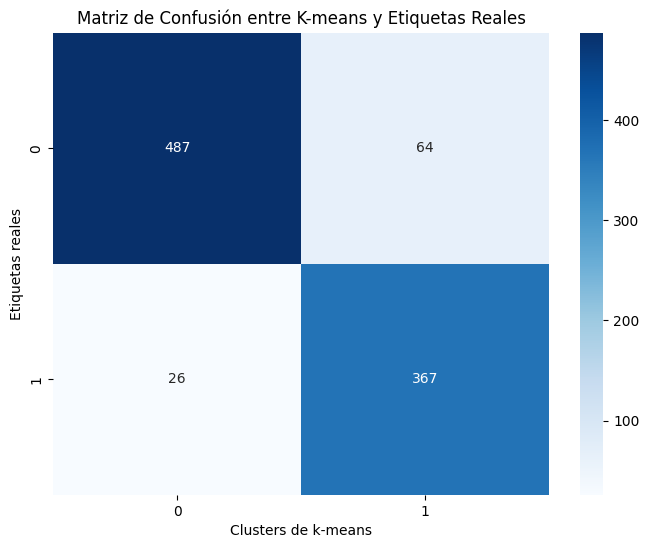

              precision    recall  f1-score   support

           0       0.95      0.88      0.92       551
           1       0.85      0.93      0.89       393

    accuracy                           0.90       944
   macro avg       0.90      0.91      0.90       944
weighted avg       0.91      0.90      0.91       944



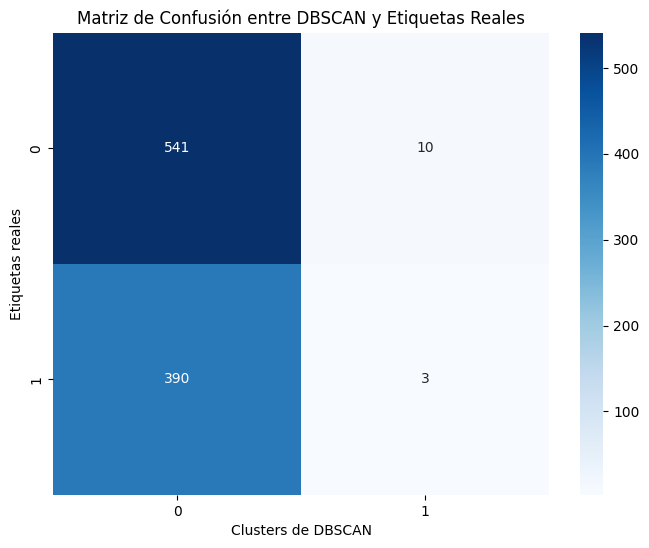

              precision    recall  f1-score   support

           0       0.58      0.98      0.73       551
           1       0.23      0.01      0.01       393

    accuracy                           0.58       944
   macro avg       0.41      0.49      0.37       944
weighted avg       0.44      0.58      0.43       944



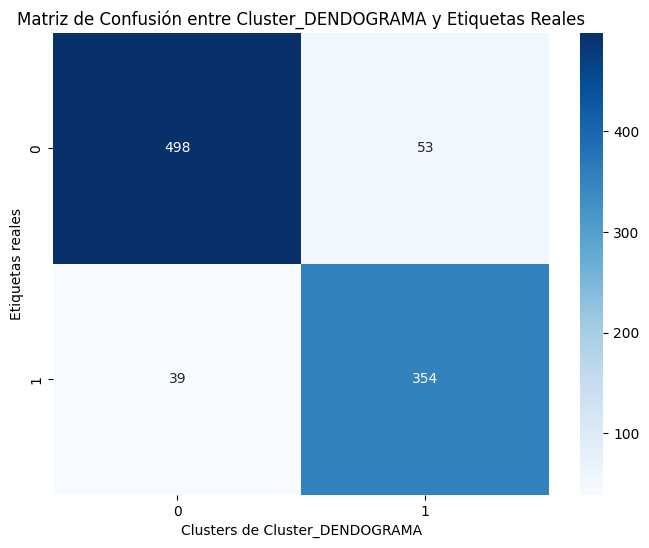

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       551
           1       0.87      0.90      0.88       393

    accuracy                           0.90       944
   macro avg       0.90      0.90      0.90       944
weighted avg       0.90      0.90      0.90       944



In [32]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


etiquetas_reales = clusters['fail'] 
etiquetas_kmeans = clusters['kmeans']


matriz_confusion_1 = confusion_matrix(etiquetas_reales, etiquetas_kmeans)

reporte_1 = classification_report(etiquetas_reales, etiquetas_kmeans,zero_division=0)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_1, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Clusters de k-means")
plt.ylabel("Etiquetas reales")
plt.title("Matriz de Confusión entre K-means y Etiquetas Reales")
plt.show()

print(reporte_1)

etiquetas_reales = clusters['fail']


clusters['Cluster_DBSCAN'] = clusters['Cluster_DBSCAN'] * -1  


etiquetas_DBSCAN = clusters['Cluster_DBSCAN'] 


# Genera la matriz de confusión
matriz_confusion_2 = confusion_matrix(etiquetas_reales, etiquetas_DBSCAN)

reporte_2 = classification_report(etiquetas_reales, etiquetas_DBSCAN,zero_division=0)

# Visualiza la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_2, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Clusters de DBSCAN")
plt.ylabel("Etiquetas reales")
plt.title("Matriz de Confusión entre DBSCAN y Etiquetas Reales")
plt.show()

print(reporte_2)

etiquetas_reales = clusters['fail']  
etiquetas_DENDOGRAMA = clusters['Cluster_DENDOGRAMA'] 

# Genera la matriz de confusión
matriz_confusion_3 = confusion_matrix(etiquetas_reales, etiquetas_DENDOGRAMA)
reporte_3 = classification_report(etiquetas_reales, etiquetas_DENDOGRAMA,zero_division=0)

# Visualiza la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_3, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Clusters de Cluster_DENDOGRAMA")
plt.ylabel("Etiquetas reales")
plt.title("Matriz de Confusión entre Cluster_DENDOGRAMA y Etiquetas Reales")
plt.show()

print(reporte_3)

## Artículos de investigación

#### Artículo 1

In [33]:
# Coloca en este espacio el análisis del artículo 1

#### Artículo 2

In [34]:
# Coloca en este espacio el análisis del artículo 1